In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Carga Datos

In [2]:
data = pd.read_csv('titanic.csv')

print(str(data.shape) + '\n')
data.head()

(891, 12)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Analisis de Datos para toma de decisiones en FE Pipeline

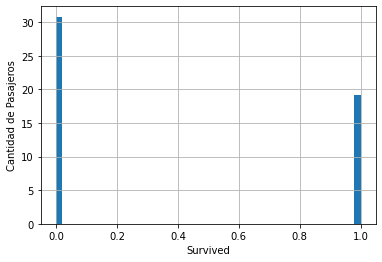

In [3]:
data['Survived'].hist(bins=50, density=True)
plt.xlabel("Survived")
plt.ylabel("Cantidad de Pasajeros")
plt.show()

#### 2.1 Verificamos tipos de variables en X

In [4]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
#cantidad e variables categoricas
len(cat_vars)

5

In [5]:
data[cat_vars].dtypes

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [6]:
#agregamos el caso especial ya que por definicion esta variables es categorica
cat_vars = cat_vars + ['Survived']

In [7]:
data[cat_vars].dtypes

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
Survived     int64
dtype: object

In [8]:
cat_vars = cat_vars + ['Pclass']

In [9]:
data[cat_vars].dtypes

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
Survived     int64
Pclass       int64
dtype: object

In [10]:
# Variables numericas

num_vars = [var for var in data.columns if (var not in cat_vars and var !='Survived')]

In [11]:
data[num_vars].dtypes

PassengerId      int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

#### 2.2 Analisis de valores faltantes

In [12]:
var_with_na = [var for var in data.columns if(data[var].isnull().sum()>0)]
len(var_with_na)

3

In [13]:
#proporcion de NAs en cada variable
data[var_with_na].isnull().mean().sort_values(ascending=False)

Cabin       0.771044
Age         0.198653
Embarked    0.002245
dtype: float64

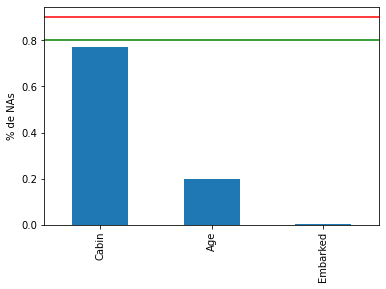

In [14]:
#graficamos % de NAs
data[var_with_na].isnull().mean().sort_values(ascending=False).plot.bar()
plt.ylabel("% de NAs")
plt.axhline(y=0.9, color="r")
plt.axhline(y=0.8, color="g")

In [15]:
#variables categoricas con NAs
cat_na = [var for var in cat_vars if var in var_with_na]
cat_na

['Cabin', 'Embarked']

In [16]:
#variables numericas con NAs
num_na = [var for var in num_vars if var in var_with_na]
num_na

['Age']

In [17]:
print ("Cantidad de variables numericas con NAs.{}". format(len(num_na)))
print ("Cantidad de variables categoricas con NAs.{}". format(len(cat_na)))

Cantidad de variables numericas con NAs.1
Cantidad de variables categoricas con NAs.2


### 2.2.1 Verificaciòn del impacto del NA contra el target (Survived)

In [18]:
df = data.copy()
var = 'Cabin'
df[var] = np.where(df[var].isnull(), 1,0)
temp = df.groupby(var)["Survived"].agg(['mean', 'std'])
temp

,mean,std
Cabin,,
0,0.666667,0.472564
1,0.299854,0.458528


In [19]:
def na_impact_over_target(df,Xvar,Yvar):
    df = data.copy()
    df[Xvar] = np.where(df[Xvar].isnull(), 1,0)
    temp = df.groupby(Xvar)[Yvar].agg(['mean', 'std'])
    temp.plot(kind="barh", y="mean", xerr="std", legend=False, title= "Survived")
    plt.show()

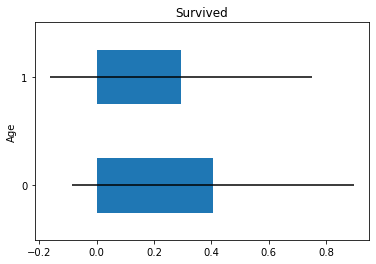

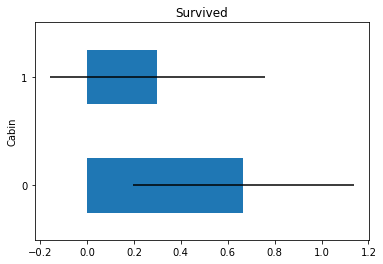

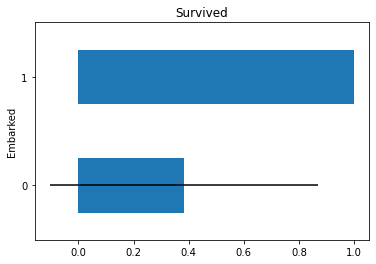

In [20]:
for var in var_with_na:
    na_impact_over_target(data,var,'Survived')

#### 2.3 Analisis Variables Discretas

In [22]:
discrete_vars =[var for var in num_vars if((len(data[var].unique()))<20)]
discrete_vars

['SibSp', 'Parch']

In [23]:
print ("Cantidad de variables Discretas: ", len(discrete_vars))

Cantidad de variables Discretas:  2


In [24]:
data[discrete_vars].head()

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0


In [25]:
import seaborn as sns

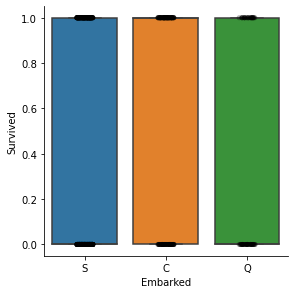

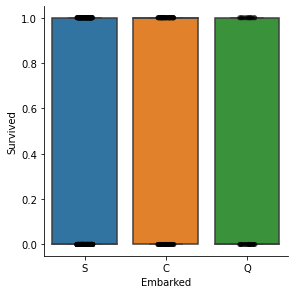

In [26]:
for va in discrete_vars:
    sns.catplot(x=var, y='Survived', data=data, kind="box", height=4)
    sns.stripplot(x=var, y='Survived', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

#### 2.4 Variables Continuas

In [27]:
cont_vars = [var for var in num_vars if var not in discrete_vars]

In [28]:
print("Variables numericas continuas: ", len(cont_vars))

Variables numericas continuas:  3


In [29]:
data[cont_vars].head()

,PassengerId,Age,Fare
0,1,22.0,7.2500
1,2,38.0,71.2833
2,3,26.0,7.9250
3,4,35.0,53.1000
4,5,35.0,8.0500


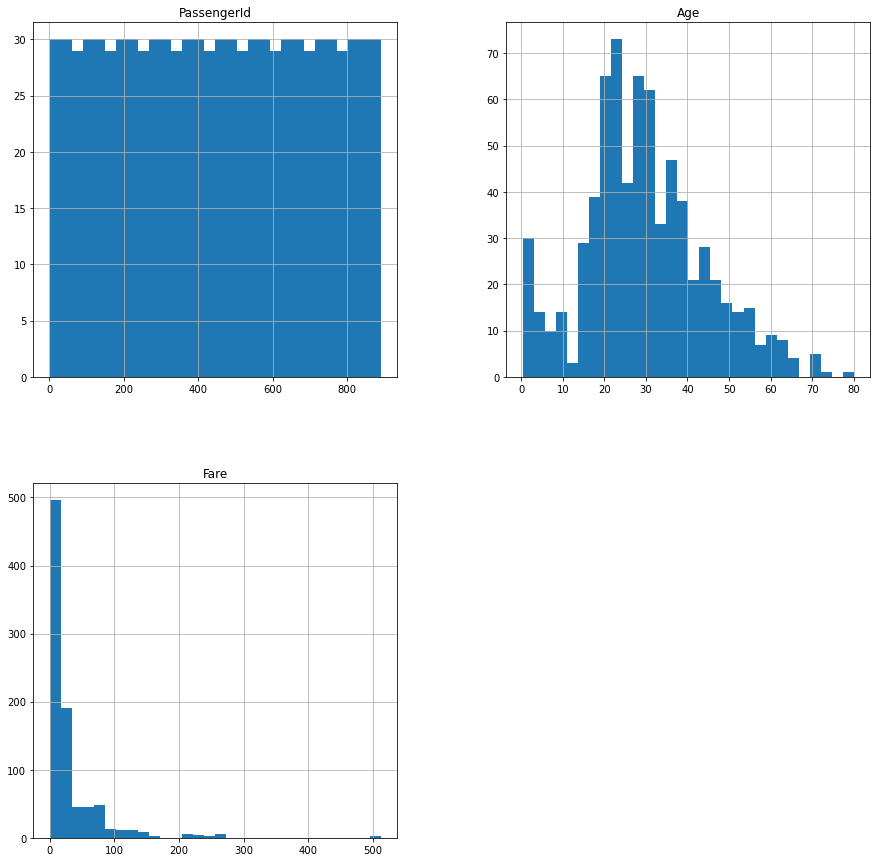

In [30]:
data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

### 2.5 Transformacion de Yeon-johnson

In [31]:
import scipy.stats as stats

In [32]:
temp_yj = data.copy()

In [33]:
for var in cont_vars:
    temp_yj[var], param=stats.yeojohnson(data[var])

<function matplotlib.pyplot.show(close=None, block=None)>

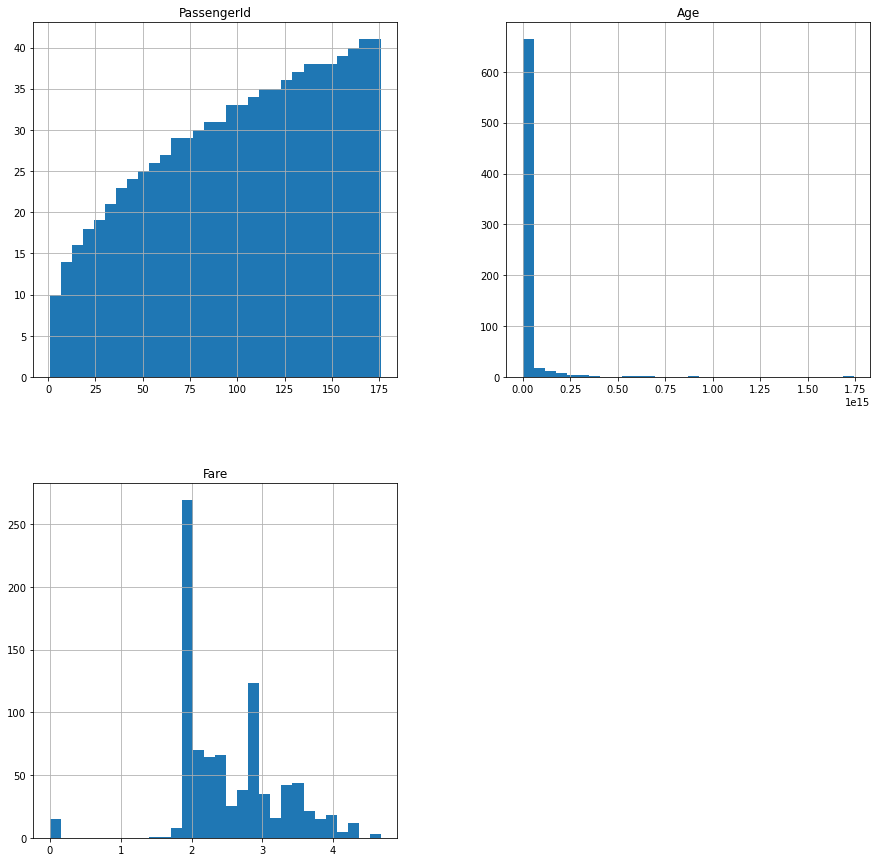

In [34]:
temp_yj[cont_vars].hist(bins=30, figsize=(15,15))
plt.show

In [35]:
temp = data.copy()

In [36]:
cont_specials = ['Age']

In [37]:
for var in cont_specials:
    temp[var] = np.log(data[var] + 1)

<function matplotlib.pyplot.show(close=None, block=None)>

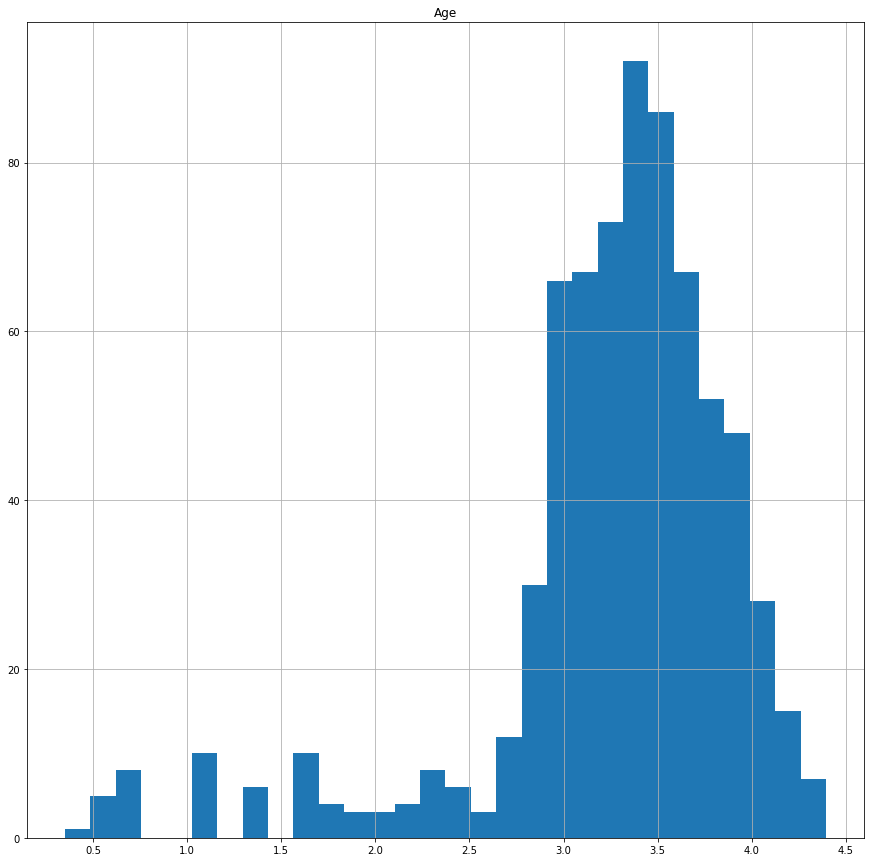

In [38]:
temp[cont_specials].hist(bins=30, figsize=(15,15))
plt.show

In [39]:
for var in cont_vars:
    temp[var] = np.log(data[var] + 1)

<function matplotlib.pyplot.show(close=None, block=None)>

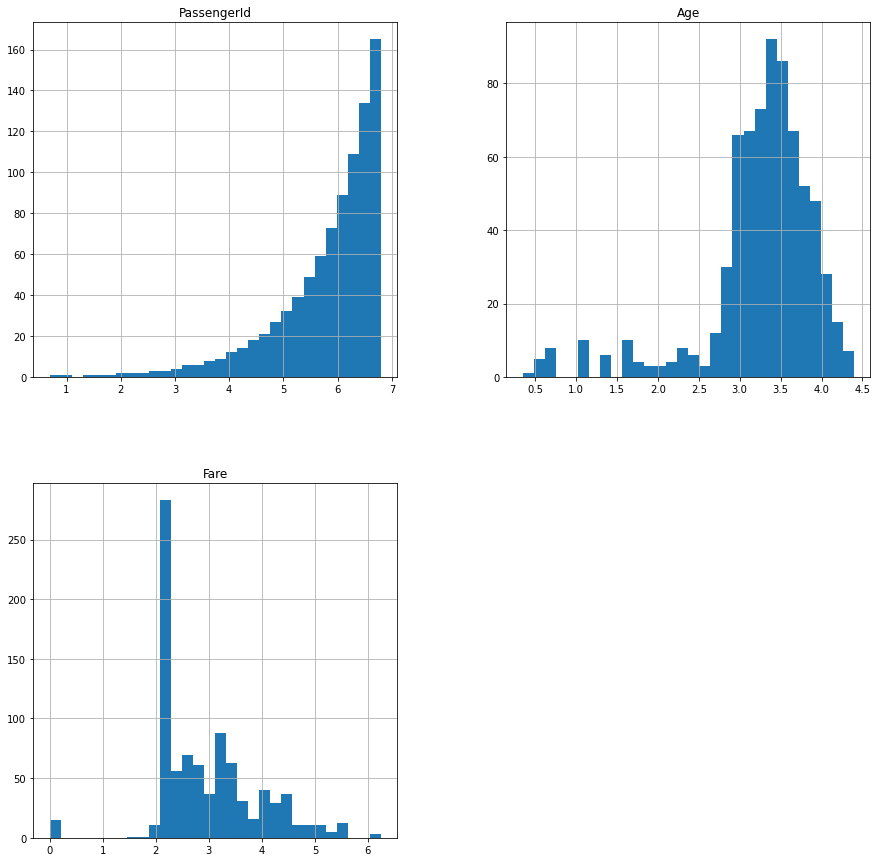

In [40]:
temp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show

C:\Users\50259\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


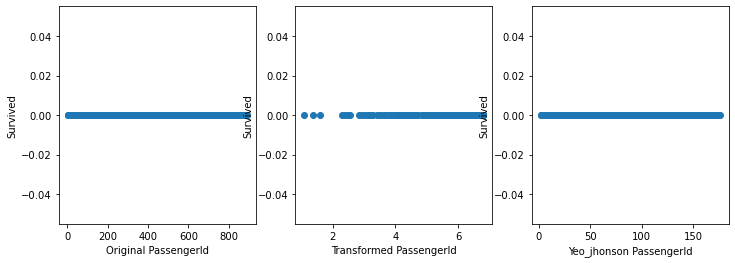

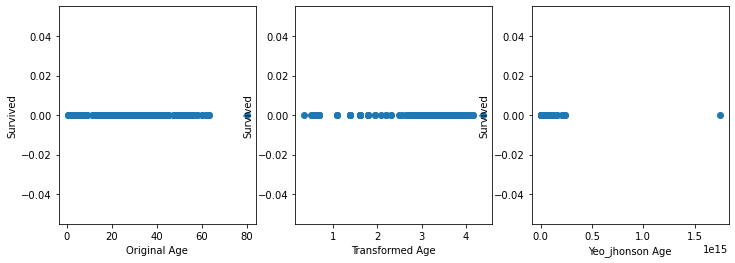

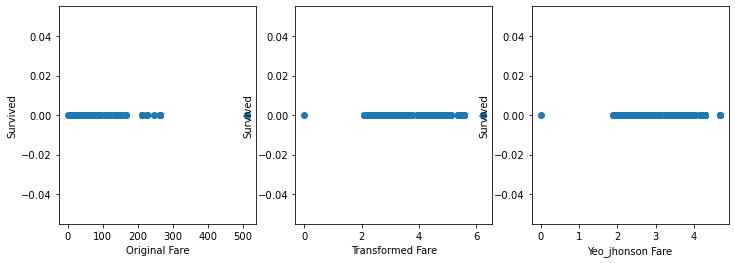

In [42]:
for var in cont_vars:
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,3,1)
    plt.scatter(data[var], np.log(data['Survived']))
    plt.ylabel("Survived")
    plt.xlabel("Original "+ var)
    
    plt.subplot(1,3,2)
    plt.scatter(temp[var], np.log(data['Survived']))
    plt.ylabel("Survived")
    plt.xlabel("Transformed "+ var)
    
    plt.subplot(1,3,3)
    plt.scatter(temp_yj[var], np.log(data['Survived']))
    plt.ylabel("Survived")
    plt.xlabel("Yeo_jhonson "+ var)
    
    plt.show()

#### 2.6 Variables Categoricas

In [43]:
len(cat_vars)

7

In [44]:
data[cat_vars].head()

,Name,Sex,Ticket,Cabin,Embarked,Survived,Pclass
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,0,3
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,1,1
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,1,3
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,1,1
4,"Allen, Mr. William Henry",male,373450,NaN,S,0,3


<AxesSubplot:>

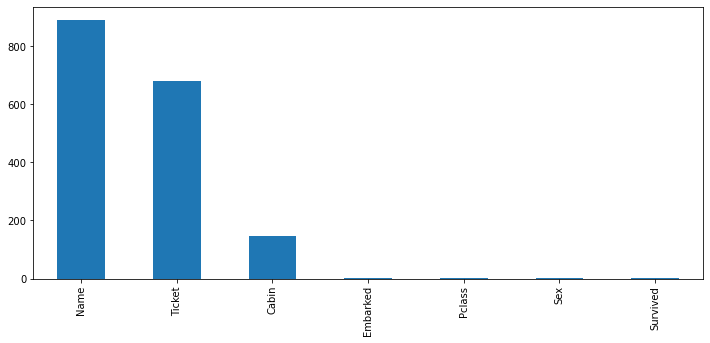

In [45]:
data[cat_vars].nunique().sort_values(ascending = False). plot.bar(figsize=(12,5))

In [48]:
np.unique(data['Pclass'])

array([1, 2, 3], dtype=int64)

In [50]:
np.unique(data['Sex']) 

array(['female', 'male'], dtype=object)

#### 2.7 Rare Labels

In [55]:
otras = [var for var in cat_vars]

In [56]:
len(otras)

7

In [57]:
def analyse_rare_labels(df,var,rare_perc):
    temp = df.groupby(var)['Survived'].count()/len(df)
    
    return temp[temp < rare_perc]

In [58]:
for var in otras:
    print(analyse_rare_labels(data,var,0.01))
    print()

Name
Abbing, Mr. Anthony                      0.001122
Abbott, Mr. Rossmore Edward              0.001122
Abbott, Mrs. Stanton (Rosa Hunt)         0.001122
Abelson, Mr. Samuel                      0.001122
Abelson, Mrs. Samuel (Hannah Wizosky)    0.001122
                                           ...   
de Mulder, Mr. Theodore                  0.001122
de Pelsmaeker, Mr. Alfons                0.001122
del Carlo, Mr. Sebastiano                0.001122
van Billiard, Mr. Austin Blyler          0.001122
van Melkebeke, Mr. Philemon              0.001122
Name: Survived, Length: 891, dtype: float64

Series([], Name: Survived, dtype: float64)

Ticket
110152         0.003367
110413         0.003367
110465         0.002245
110564         0.001122
110813         0.001122
                 ...   
W./C. 6608     0.004489
W./C. 6609     0.001122
W.E.P. 5734    0.001122
W/C 14208      0.001122
WE/P 5735      0.002245
Name: Survived, Length: 681, dtype: float64

Cabin
A10    0.001122
A14    0.001122
A1

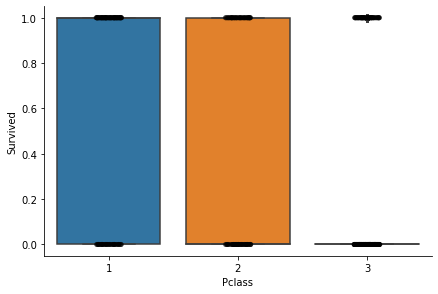

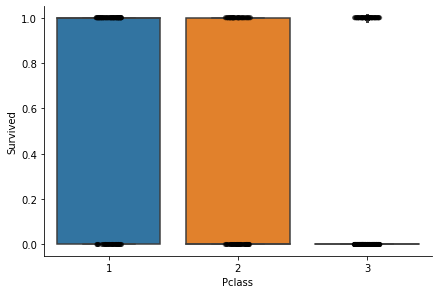

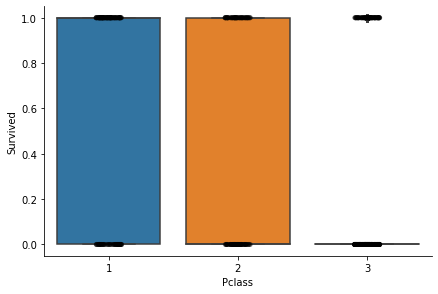

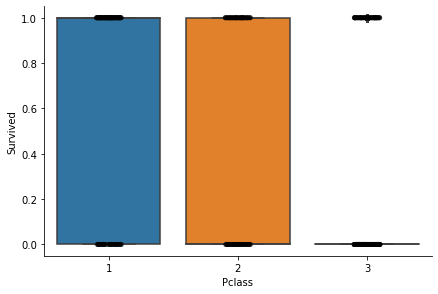

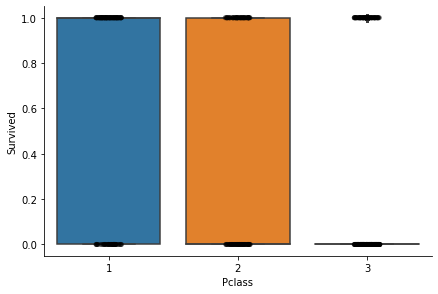

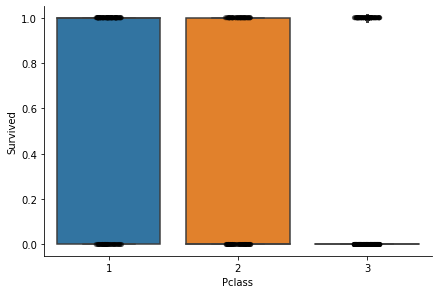

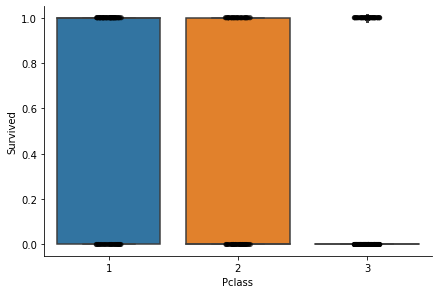

In [59]:
for va in otras:
    sns.catplot(x=var, y='Survived', data=data, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='Survived', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()